# 1st Approach  - By PAM(Partioning Around Medoids),which uses Euclidean Distance

<h2> ==> PAM is computationally expensive and would not work well with large datasets.</h2>

# Step -1 : Pick K=3 points as medoids. Select 1st medoid randomly and other 2 medoids using Probabilistic Proportion approach.


In [8]:
import random 

#Original Data Points
data_points = []

for i in range(0,100):
    d = round(random.random(),2)
    data_points.append(d)    
#print(data_points)

#Selecting k(three) random medoids
list1 = data_points

#Select first medoid m1
m1 = random.choice(list1)
#list1.remove(m1)

In [9]:
#Select second medoid m2 
list2 = []
sumOfAll = sum(list1) 
dict1 = {}

for item in list1:        
        distance = (item - m1)**2
        distance = round(distance/sumOfAll,5)
        list2.append(distance)
        
for i in range(0,len(list2)):
    dict1[i] = list2[i]

list2.sort()

for x,y in dict1.items():
    if list2[-1] == y:
        m2 = list1[x]

#print(list1,list2,dict1,c2,c1,sep='\n')
#list1.remove(m2)  

In [10]:
#Select third medoid m3
sumOfAll = sum(list1) 
list3 = []
dict2 = {}
for item in list1:
        distance1 = (item - m1)**2               
        distance2 = (item - m2)**2
        
        if distance1>distance2:
            distance1 = round(distance1/sumOfAll,5)
            list3.append(distance1)
        else:
            distance2 = round(distance2/sumOfAll,5)
            list3.append(distance2)

for i in range(0,len(list3)):
    dict2[i] = list3[i]

list3.sort()

for x,y in dict2.items():
    if list3[-1] == y:
        m3 = list1[x]

print(m1,m2,m3,sep='\n')
#list1.remove(m3)

0.29
1.0
0.05


# Step-2 : For each x data point, calculate the distance from each medoid and assign it to nearest medoid.

In [11]:
#defining sets/clusters based on the nearest medoids 

def nearest_medoid(list1,m1,m2,m3):
    set1 = []
    set2 = []
    set3 = []
    for item in list1:
        dist1 = (m1 - item)**2 #using squares of data to get modules
        dist2 = (m2 - item)**2 #using squares of data to get modules
        dist3 = (m3 - item)**2 #using squares of data to get modules       
              
        if dist1<dist2 and dist1<dist3:
            set1.append(item)
        elif dist2<dist1 and dist2<dist3:
            set2.append(item)
        else:
            set3.append(item) 
        
    return set1,set2,set3

# Step-3 : Find each medoid for each cluster by calculating squared distance of each points from the medoid and calculating the loss value. If the loss value is less than the previous loss value swap the medoid with non-medoid points else keep the previous medoid.


In [12]:
#to calculate the loss value form each culsters
def new_medoid(m1,m2,m3,cluster1,cluster2,cluster3):
    
    previous_medoid_cluster1 = []
    previous_medoid_cluster2 = []
    previous_medoid_cluster3 = []
    all_medoids = dict()
    for_sort = dict()
    sorted_list = []
    
    def final_loss(m1,m2,m3,cluster1,cluster2,cluster3):
        for item1 in cluster1:
            loss_value1 = (m1 - item1)**2
        
        for item2 in cluster2:
            loss_value2 = (m2 - item2)**2
        
        for item3 in cluster3:
            loss_value3 = (m3 - item3)**2
            
        
        final_loss_value = loss_value1 + loss_value2 + loss_value3
        
        return final_loss_value
    
    all_medoids[(m1,m2,m3)] = final_loss(m1,m2,m3,cluster1,cluster2,cluster3)
    
    def select_medoid1(m1,cluster1):
        previous_medoid_cluster1.append(m1)
        new_medoid = random.choice(cluster1)
        
        for i in previous_medoid_cluster1:
            while i==new_medoid:
                new_medoid = random.choice(cluster1)
        return new_medoid
       
    def select_medoid2(m2,cluster2):
        previous_medoid_cluster2.append(m2)
        new_medoid = random.choice(cluster2)
        
        for i in previous_medoid_cluster2:
            while i==new_medoid:
                new_medoid = random.choice(cluster2)
        return new_medoid

    def select_medoid3(m3,cluster3):
        previous_medoid_cluster3.append(m3)
        new_medoid = random.choice(cluster3)
        
        for i in previous_medoid_cluster3:
            while i==new_medoid:
                new_medoid = random.choice(cluster3)
        return new_medoid
    
    for item1 in cluster1:
        m1 = select_medoid1(m1,cluster1)
        final_loss(m1,m2,m3,cluster1,cluster2,cluster3)
        all_medoids[(m1,m2,m3)] = final_loss(m1,m2,m3,cluster1,cluster2,cluster3)
        
        for item2 in cluster2:
            m2 = select_medoid2(m2,cluster2)
            final_loss(m1,m2,m3,cluster1,cluster2,cluster3)
            all_medoids[(m1,m2,m3)] = final_loss(m1,m2,m3,cluster1,cluster2,cluster3)
    
            for item3 in cluster3:
                m3 = select_medoid3(m3,cluster3)
                final_loss(m1,m2,m3,cluster1,cluster2,cluster3)
                all_medoids[(m1,m2,m3)] = final_loss(m1,m2,m3,cluster1,cluster2,cluster3)
    
    i = 0
    for value in all_medoids.values():
        for_sort[value] = i
        sorted_list.append(value)
        i = i+1  
        
    
    sorted_list.sort()
    
    for x,y in for_sort.items():
        if sorted_list[0] == x:
            index_loss = y
            break
    j= 0        
    for key in all_medoids.keys():
        if j == index_loss:
            new_m = tuple(key)
            break
        j = j+1
    
    return new_m

# Step-4 : Compare new medoid with old medoid, if distance is negligible break the loop or reperform step2.

In [13]:
#to compare different medoids values
def compare_newM_with_OldM(m1,m2,m3,set1,set2,set3):
       
    old_m1 = m1
    old_m2 = m2
    old_m3 = m3

    new_m = new_medoid(m1,m2,m3,set1,set2,set3) 
   
    new_m1 = new_m[0]
    new_m2 = new_m[1]
    new_m3 = new_m[2]

    if old_m1<=new_m1:
        new_m1 = old_m1

    if old_m2<=new_m2:
        new_m2 = old_m2

    if old_m3<=new_m3:
        new_cm = old_m3

    return new_m1,new_m2,new_m3

print('old_m1 = {} old_m2 = {} old_m3 = {}'.format(m1,m2,m3))

while 1:
    #print('old_c1 = {} old_c2 = {} old_c3 ={}'.format(c1,c2,c3))
    tuple0 = nearest_medoid(list1,m1,m2,m3)
    set1 = tuple0[0]
    set2 = tuple0[1]
    set3 = tuple0[2]
    
    tuple1 = compare_newM_with_OldM(m1,m2,m3,set1,set2,set3)
    new_m1 = round(tuple1[0],2)
    new_m2 = round(tuple1[1],2)
    new_m3 = round(tuple1[2],2)
    
    if m1==new_m1 and m2==new_m2 and m3==new_m3:
        break
    else:
        m1 = new_m1
        m2 = new_m2
        m3 = new_m3  
    print('new_m1 = {} new_m2 = {} new_m3 = {}'.format(new_m1,new_m2,new_m3))
        
print('new_m1 = {} new_m2 = {} new_m3 = {}'.format(new_m1,new_m2,new_m3))

old_m1 = 0.29 old_m2 = 1.0 old_m3 = 0.05
new_m1 = 0.29 new_m2 = 0.88 new_m3 = 0.15
new_m1 = 0.29 new_m2 = 0.88 new_m3 = 0.17
new_m1 = 0.29 new_m2 = 0.88 new_m3 = 0.17


In [14]:
print(len(set1),len(set2),len(set3),sep='\n')

41
45
14


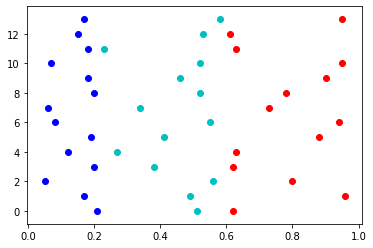

In [16]:
import matplotlib.pyplot as plt
y = []
for i in range(0,14):
    y.append(i)

y.sort()

plt.scatter(set1[0:14],y,color = 'c' )
plt.scatter(set2[0:14],y,color = 'r' )
plt.scatter(set3[0:14],y,color = 'b' )
plt.show()